<a href="https://colab.research.google.com/github/mtareqsoliman/msthesis/blob/main/2ANN_11132022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Algorithms: 2 ANN methods



### $P[D>d|IM=x]=𝚽\frac{ln(x)-λ(α_ɛ,α_V)}{β(α_ɛ,α_V)}$

where $\zeta$ is logarithmic mean  and $\lambda$ and $0\leq x\leq \infty$ 

### **First Method: ANN replaces the surface equation**
*1) Randomly generate α\_ɛcu & α_Vᵤ combinations*

*2) Find λs and βs for each combination*

*3) Train the ANN for predicting λ and β for any α\_ɛ & α_V combination that may be required*


### **Second method: ANN replaces the fragility model directly (No more log-normal func. assumption)**

*1) Randomly generate α\_ɛcu & α_Vᵤ combinations*

*2) At each "x" level identify the $P[D>d|IM=x,α\_ɛ,α\_V]$*

*3) Train the ANN for predicting P for any combination that may be required*





### **First Method: ANN replaces the surface equation**

### Step 1) Generation of random variables:

### $f(x)=\frac{1}{\zeta x\sqrt{2\pi}}exp(-\frac{1}{2}(\frac{lnx-\lambda}{\zeta}))^2$

$𝛆 = -np.random.lognormal(np.log(0.006),np.sqrt(np.log(1+0.35**2)),100)$

where $mean = ln(0.006)$ and $std. dev = \sqrt{ln(1+0.35^2)}$


$P[D>d|IM=x]=𝚽\frac{ln(x)-λ(α_ɛ,α_V)}{β(α_ɛ,α_V)}$

In [1]:
import pandas as pd
import numpy as np
import math as math
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.gridspec import GridSpec
import scipy.stats as sp
from scipy.optimize import minimize, LinearConstraint
import scipy.optimize as spo
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import rc
from matplotlib import rcParams
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

np.seterr(divide='ignore')


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [83]:

NLTHA100 = pd.read_excel('https://github.com/mtareqsoliman/msthesis/blob/main/Results/100NLTHA_FINAL.xlsx?raw=true')
                          # ln(x)                                mean(ln(x))                                  stdev(ln(x))
ecu_100_alpha = norm.cdf(np.log(-np.array(NLTHA100[['ecu']])), np.log(-np.array(NLTHA100[['ecu']])).mean(), np.log(-np.array(NLTHA100[['ecu']])).std())
Vult_100_alpha = norm.cdf(np.log(np.array(NLTHA100[['Vult']])), np.log(np.array(NLTHA100[['Vult']])).mean(), np.log(np.array(NLTHA100[['Vult']])).std())

ecu_100_alpha, Vult_100_alpha = norm.ppf(ecu_100_alpha,0,1) , norm.ppf(Vult_100_alpha,0,1)

NLTHA100.insert(2,'ecu_alpha',ecu_100_alpha)
NLTHA100.insert(3,'Vult_alpha',Vult_100_alpha)
NLTHA100

,state,IM,ecu_alpha,Vult_alpha,record,ecu,Vult,Vbmax,ect,ecb,uindex,convergence
0,0,5,-2.813518,1.606817,RSN126_GAZLI_GAZ000,-0.002400,229.521449,61.769036,-0.000417,-0.000707,0,0
1,0,5,-2.813518,1.606817,RSN461_MORGAN_HVR240,-0.002400,229.521449,59.940031,-0.000410,-0.000683,0,0
2,0,5,-2.813518,1.606817,RSN518_PALMSPR_FVR045,-0.002400,229.521449,117.263469,-0.000838,-0.001389,0,0
3,0,5,-2.813518,1.606817,RSN599_WHITTIER.A_A-FLO020,-0.002400,229.521449,133.191829,-0.001051,-0.002344,0,0
4,0,5,-2.813518,1.606817,RSN721_SUPER.B_B-ICC090,-0.002400,229.521449,79.856953,-0.000524,-0.000925,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9595,1,40,0.048773,-2.328627,RSN1605_DUZCE_DZC270,-0.006187,113.030293,150.644869,-0.005808,-0.101586,692,0
9596,1,40,-1.592317,1.027135,RSN1605_DUZCE_DZC270,-0.003595,206.780844,116.144114,-0.001369,-0.086233,694,FAILED
9597,0,40,1.819887,-0.170164,RSN1148_KOCAELI_ARE000,-0.011115,166.693662,163.439663,-0.002903,-0.008846,0,0
9598,1,40,0.487664,0.438625,RSN1605_DUZCE_DZC270,-0.007153,185.997557,155.132256,-0.003463,-0.095869,936,0


In [84]:
NLTHA100_pivot = pd.pivot_table(NLTHA100, values='state', index=['ecu_alpha','Vult_alpha'],columns=['IM'], aggfunc=np.sum)  #merging rows makes more problems so leave them as they are
NLTHA100_pivot.insert(0,0,0)
NLTHA100_pivot= NLTHA100_pivot/12

NLTHA100.to_excel('ssss.xlsx')

NLTHA100_pivot

,IM,0,5,10,15,20,25,30,35,40
ecu_alpha,Vult_alpha,,,,,,,,,
-2.813518,1.606817,0.0,0.000000,0.333333,0.666667,0.916667,1.000000,1.000000,1.000000,1.000000
-2.355960,-0.040334,0.0,0.000000,0.333333,0.666667,0.833333,1.000000,1.000000,1.000000,1.000000
-1.965330,-1.051338,0.0,0.166667,0.916667,1.000000,0.916667,1.000000,1.000000,1.000000,1.000000
-1.634811,0.801003,0.0,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.000000,1.000000
-1.592317,1.027135,0.0,0.083333,0.583333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
1.532694,-0.664430,0.0,0.000000,0.000000,0.333333,0.583333,0.750000,0.833333,1.000000,1.000000
1.614772,-0.343347,0.0,0.000000,0.000000,0.083333,0.333333,0.666667,0.750000,0.833333,0.916667
1.751943,1.083291,0.0,0.000000,0.000000,0.000000,0.000000,0.333333,0.583333,0.750000,0.833333


### Step 2) Find $\lambda$ and $\zeta$ for each combination:


### $P[D>d|IM=x]=Φ\frac{ln(x)-λ(α_ɛ,α_V)}{ζ(α_ɛ,α_V)}$

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract



         eps         V  $lambda$  $zeta$  slope
0  -2.813518  1.606817     12.19    0.34  -4.35
1  -2.355960 -0.040334     12.45    0.37  -5.04
2  -1.965330 -1.051338      6.89    0.46  -5.89
3  -1.634811  0.801003      9.18    0.37  -3.99
4  -1.592317  1.027135      8.51    0.33  -3.40
..       ...       ...       ...     ...    ...
95  1.532694 -0.664430     18.95    0.34  -7.13
96  1.614772 -0.343347     23.49    0.36  -7.80
97  1.751943  1.083291     29.57    0.25  -6.69
98  1.793263  0.548404     29.57    0.25  -6.69
99  1.819887 -0.170164     28.13    0.28  -7.03

[100 rows x 5 columns]


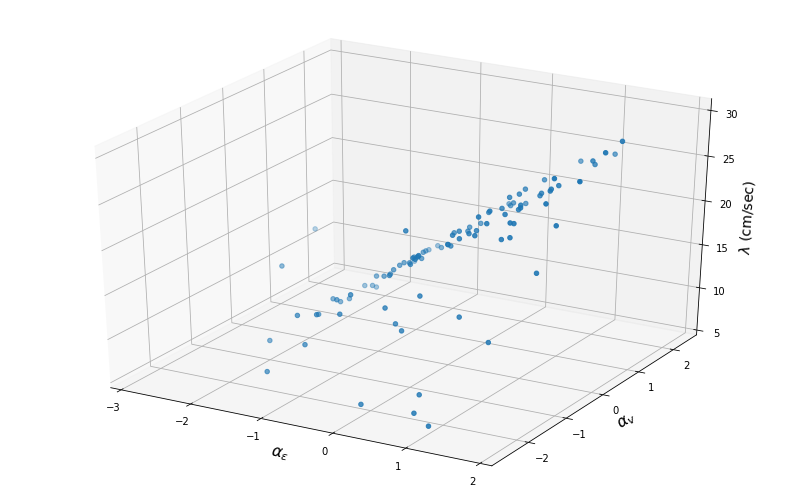

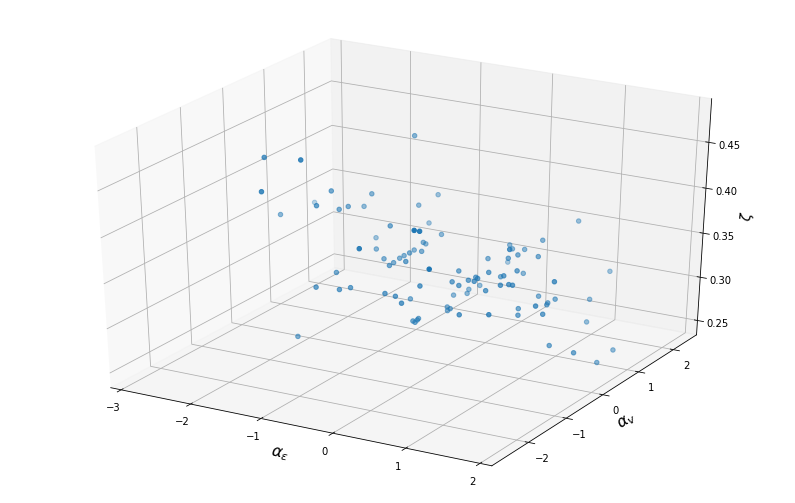

In [85]:

##pivot_numpy = np.concatenate((np.zeros(9)[:, np.newaxis], pivot_numpy), axis=1)
ecu_100_alpha_frag, Vult_100_alpha_frag = zip(*NLTHA100_pivot.index.values)
ecu_100_alpha_frag, Vult_100_alpha_frag = np.asarray(ecu_100_alpha_frag), np.asarray(Vult_100_alpha_frag)

result_100_list = []
theta_100_list = []
beta_100_list = []

IM = np.arange(0,45,5)
fragility_table = pd.DataFrame(columns = ['0','5','10','15','20','25','30','35','40'])
z_list = []

def frag(thetabeta):
    estimated_fragility = sp.norm.cdf(np.log(factor_list),np.log(thetabeta[0]),thetabeta[1])
    log_likelihood = np.log(sp.binom.pmf(pcllps*nrcrds,nrcrds,estimated_fragility))
    fun = -np.sum(log_likelihood)

    return fun

for i,ecu_i in enumerate(ecu_100_alpha_frag):
    factor_list = np.array([0,5,10,15,20,25,30,35,40])
    pcllps = NLTHA100_pivot.iloc[i]
    nrcrds = 12
    ncllps = pcllps*nrcrds

    # starting guess
    theta, beta = 24,0.4
    
    # Bounds
    bnds = ((4, 50), (0.2, 1))

    thetabeta_start = [theta,beta]
    
    result = spo.minimize(frag,thetabeta_start,options={'disp': True},bounds=bnds)

    if result.success:
        miny = result.x
        theta_mxlk = round(miny[0],2)
        beta_mxlk = round(miny[1],2)
        theta_100_list.append(theta_mxlk)
        beta_100_list.append(beta_mxlk)

        z_mxlk = -round(result.fun,2)
        z_list.append(z_mxlk)
        fragility_table.loc[i] = sp.norm.cdf(np.log(IM),np.log(theta_mxlk),beta_mxlk)

theta_100_list = np.array(theta_100_list)
beta_100_list = np.array(beta_100_list)

print(pd.DataFrame({"eps":ecu_100_alpha_frag,"V":Vult_100_alpha_frag,"$lambda$":theta_100_list,'$zeta$':beta_100_list,'slope':z_list},index=None))

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

# Creating plot
ax.scatter(ecu_100_alpha_frag, Vult_100_alpha_frag, theta_100_list)
ax.set_zlabel(r"$\lambda$ (cm/sec)",fontsize=14)
ax.set_xlabel(r"$\alpha_\epsilon$",fontsize=16)
ax.set_ylabel(r"$\alpha_v$",fontsize=16)
fig.show()
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.scatter(ecu_100_alpha_frag, Vult_100_alpha_frag, beta_100_list)
ax.set_zlabel(r"$\zeta$",fontsize=14)
ax.set_xlabel(r"$\alpha_\epsilon$",fontsize=16)
ax.set_ylabel(r"$\alpha_v$",fontsize=16)
fig.show()


### Step 3) Train ANN for predicting $\lambda$ and $\zeta$ for any combination that may be required:

0.10251695688626743


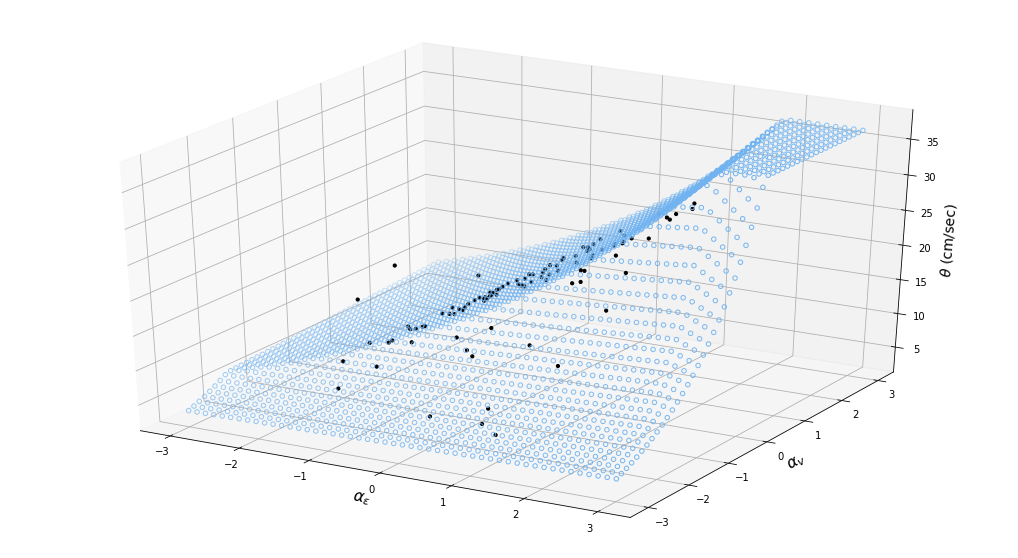

In [86]:
from sklearn.neural_network import MLPRegressor

x_1,x_2 = map(list,zip(*NLTHA100_pivot.index.values))
x_values =np.column_stack((x_1,x_2))
y_values = np.log(theta_100_list)
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, train_size=0.7, test_size=0.3,random_state=2022)


regr_m1 = MLPRegressor(solver='lbfgs', alpha=0.1, random_state=2022,hidden_layer_sizes=(2,3))
regr_m1.fit(X_train, y_train)

y_pred_train_m1 = regr_m1.predict(X_train)
y_pred_test_m1 = regr_m1.predict(X_test)
y_pred_m1 = regr_m1.predict(x_values)
MSE = mean_squared_error(y_test, y_pred_test_m1, squared=False)
print(MSE)


x1_mesh,x2_mesh = np.linspace(-3, 3, 50), np.linspace(-3, 3, 50)
x1_mesh, x2_mesh = np.meshgrid(x1_mesh, x2_mesh)
X_mesh = np.array([x1_mesh.flatten(), x2_mesh.flatten()]).T
y_mesh_m1 = regr_m1.predict(X_mesh)

fig, ax = plt.subplots(figsize =(18,10), subplot_kw={'projection': '3d'})


ax.set_zlabel(r"$\theta$ (cm/sec)",fontsize=14)
ax.set_xlabel(r"$\alpha_\epsilon$",fontsize=16)
ax.set_ylabel(r"$\alpha_v$",fontsize=16)

ax.scatter(x_values[:,0], x_values[:,1], np.exp(y_values),color='black',marker='.',alpha=1,s=40)
ax.scatter(x1_mesh, x2_mesh, np.exp(y_mesh_m1), facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')

result_table = pd.DataFrame({'y_act':y_values.tolist(),'y_pred':y_pred_m1.tolist()}).to_excel('ssss.xlsx')

In [49]:
x1_mesh,x2_mesh = np.linspace(-2.5, 2.5, 30), np.linspace(-2.5, 2.5, 30)
x1_mesh, x2_mesh = np.meshgrid(x1_mesh, x2_mesh)
X_mesh = np.array([x1_mesh.flatten(), x2_mesh.flatten()]).T


def mesh_maker(nperceptrons):

    regr = MLPRegressor(hidden_layer_sizes=(nperceptrons,3),solver='lbfgs', alpha=0.1, random_state=2022,max_iter=1000)
    regr.fit(X_train, y_train)

    y_pred = regr.predict(X_test)
    #p00,p10,p01,p20,p11,p02 = regression_model.coef_.T
    MSE = mean_squared_error(y_test, y_pred, squared=False)
    y_mesh = regr.predict(X_mesh)
    return y_mesh

fig = go.Figure()

fig.add_trace(
              go.Scatter3d(x=ecu_100_alpha_frag, y=Vult_100_alpha_frag, z=theta_100_list,mode='markers',marker_size=1.5,marker_color='red',opacity=0.7))

for nlyrs, clrscl,lbl in zip([2,5,10],["Sunsetdark","Viridis","emrld"],['2 layers','5 layers','10 layers']):
    fig.add_trace(                       
                  go.Scatter3d(x=X_mesh[:,0], y=X_mesh[:,1], z=np.exp(mesh_maker(nlyrs)),mode='markers',marker_size=2,marker_color='silver',opacity=0.3,visible=False))

    fig.add_trace(
                  go.Mesh3d(x=X_mesh[:,0], y=X_mesh[:,1], z=np.exp(mesh_maker(nlyrs))
                            ,opacity=0.4, contour_show=True,
                            intensity=np.exp(mesh_maker(nlyrs)),
                            colorscale=clrscl,visible=False))


fig.update_layout(scene = dict(
                              xaxis_title=r"alpha_ecu",
                              yaxis_title='alpha_Vult',
                              zaxis_title=r"$\theta$ (cm/sec)"),
                              width=800,
                              height=600,
                              legend=dict(itemclick=False),
                showlegend=False,
                autosize=False,
                margin=dict(t=40, b=0, l=0, r=0)
                )

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Just points",
                     method="update",
                     args=[{"visible": [True,False, False, False, False, False, False]},
                           {"title": "No model",
                            "annotations": []}]),
                dict(label="2 perceptrons",
                     method="update",
                     args=[{"visible": [True,True, True, False, False, False, False]},
                           {"title": "2 perceptrons",
                            "annotations": []}]),
                dict(label="5 perceptrons",
                     method="update",
                    args=[{"visible": [True,False, False, True, True, False, False]},
                           {"title": "5 perceptrons",
                            "annotations": []}]),
                dict(label="10 perceptrons",
                     method="update",
                     args=[{"visible": [True,False, False, False, False, True, True]},
                           {"title": "10 perceptrons",
                            "annotations":  []}]),
            ]),
        )
    ])

fig.show()

# Add dropdown



0.9054120341193489


0.9521434841599056


0.9378578554087992




'\n## graphing residual plot\n\ny_test_residual = (y_test_pred-y_test)\n\n\nfig = plt.figure(figsize =(14, 9))\nax = plt.axes(projection =\'3d\')\n\n\nax.set_xlabel(r"$\x07lpha_\\epsilon$",fontsize=16)\nax.set_ylabel(r"$\x07lpha_v$",fontsize=16)\nax.set_zlabel(r"$\theta$ residual (cm/sec)",fontsize=14)\nax.set_zlim(-1,1)\n\nax.scatter(x_values[:,0], x_values[:,1], (y_pred-y_values)/y_values,color=\'black\',marker=\'.\',alpha=1,s=70)\nax.scatter(test_x[:,0], test_x[:,1], y_test_residual/y_test,color=\'black\',marker=\'.\',alpha=0.25,s=70)\n'

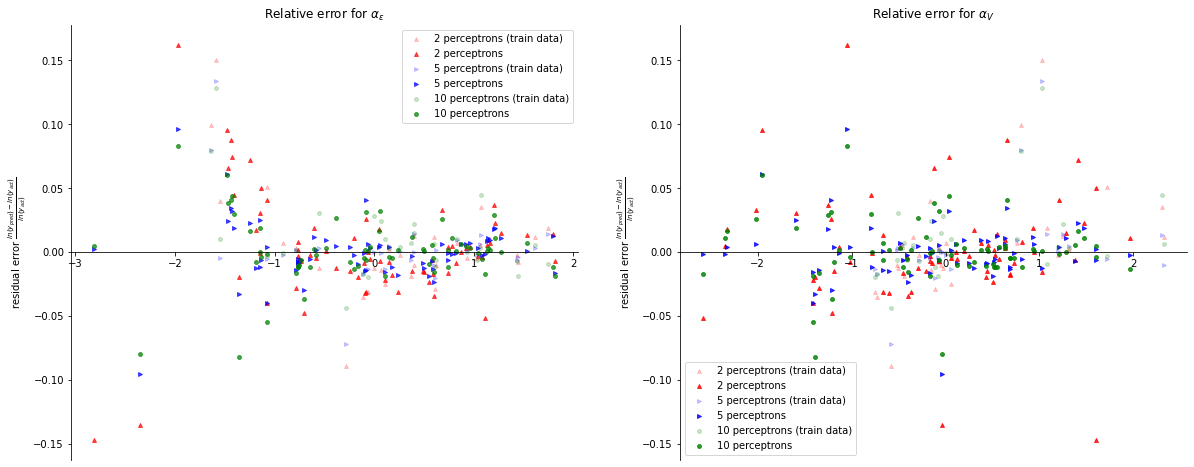

In [50]:
######## testing phase ################

## preparing data

fig,ax = plt.subplots(1,2,figsize=(20,8))


for lbl,clr,nprcptrns,mrkr in zip(['2 perceptrons','5 perceptrons','10 perceptrons'],['red','blue','green'],[2,5,10],['^','>','o']):


    regr = MLPRegressor(hidden_layer_sizes=(nprcptrns,3),solver='lbfgs', alpha=0.1, random_state=2022,max_iter=1000)
    regr.fit(X_train, y_train)

    y_train_pred = regr.predict(X_train)
    y_test_pred = regr.predict(X_test)
    MSE = mean_squared_error(y_test, y_test_pred, squared=False)
 
    r2 = r2_score(np.exp(y_test), np.exp(y_test_pred))
    y_test_residual = (y_test_pred-y_test)/y_test
    y_train_residual = (y_train_pred-y_train)/y_train

    print(r2)
    ax[0].scatter(X_test[:,0],y_test_residual,color=clr,s=15,label=lbl+' (train data)',alpha=0.2,marker=mrkr)
    ax[0].scatter(X_train[:,0],y_train_residual,color=clr,s=15,label=lbl,alpha=0.7,marker=mrkr)
    ax[0].spines['bottom'].set_position('zero')
    ax[0].spines['right'].set_color('none')
    ax[0].spines['top'].set_color('none')
    ax[0].set_title(r"Relative error for $\alpha_\epsilon$")
    ax[0].set_ylabel(r"residual error $\frac{ln(y_{pred})-ln(y_{act})}{ln(y_{act})}$")
    ax[0].legend()

    ax[1].scatter(X_test[:,1],y_test_residual,color=clr,s=15,label=lbl+' (train data)',alpha=0.2,marker=mrkr)
    ax[1].scatter(X_train[:,1],y_train_residual,color=clr,s=15,label=lbl,alpha=0.8,marker=mrkr)
    ax[1].spines['bottom'].set_position('zero')
    ax[1].spines['right'].set_color('none')
    ax[1].spines['top'].set_color('none')
    ax[1].set_title(r"Relative error for $\alpha_V$")
    ax[1].set_ylabel(r"residual error $\frac{ln(y_{pred})-ln(y_{act})}{ln(y_{act})}$")
    ax[1].legend()


    print('\n')
'''
## graphing residual plot

y_test_residual = (y_test_pred-y_test)


fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')


ax.set_xlabel(r"$\alpha_\epsilon$",fontsize=16)
ax.set_ylabel(r"$\alpha_v$",fontsize=16)
ax.set_zlabel(r"$\theta$ residual (cm/sec)",fontsize=14)
ax.set_zlim(-1,1)

ax.scatter(x_values[:,0], x_values[:,1], (y_pred-y_values)/y_values,color='black',marker='.',alpha=1,s=70)
ax.scatter(test_x[:,0], test_x[:,1], y_test_residual/y_test,color='black',marker='.',alpha=0.25,s=70)
'''

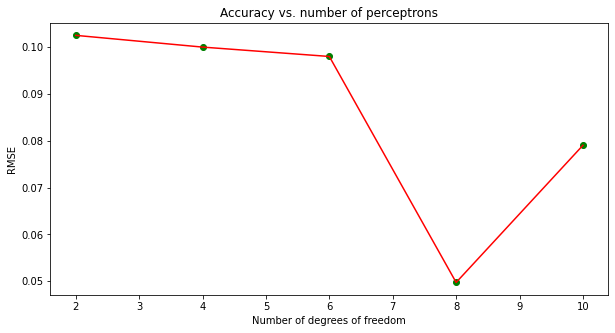

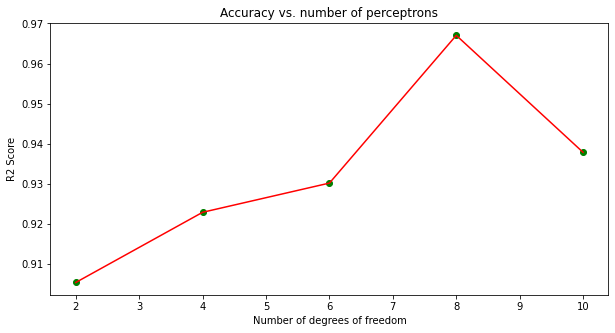

In [52]:
number_layers = [2,3,4,5,6,7,8]
number_perceptrons = [2,4,6,8,10]
plt_mean_squared_error = []
plt_r2_score = []
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, train_size=0.7, test_size=0.3, random_state=2022)

for nprcptrn in number_perceptrons:

    regr = MLPRegressor(hidden_layer_sizes=(nprcptrn,3),solver='lbfgs', alpha=0.1, random_state=2022,max_iter=2000)
    regr.fit(X_train, y_train)

    y_train_pred = regr.predict(X_train)
    y_test_pred = regr.predict(X_test)
 
    plt_mean_squared_error.append(mean_squared_error(y_test, y_test_pred, squared=False))
    plt_r2_score.append(r2_score(np.exp(y_test), np.exp(y_test_pred)))


fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(number_perceptrons,plt_mean_squared_error, color="green")
ax.plot(number_perceptrons,plt_mean_squared_error, color="red")
ax.xaxis.get_major_locator().set_params(integer=True)
ax.set_xlabel('Number of degrees of freedom')
ax.set_ylabel('RMSE')
ax.set_title('Accuracy vs. number of perceptrons')

fig,ax = plt.subplots(figsize=(10,5))  
ax.scatter(number_perceptrons,plt_r2_score, color="green")
ax.plot(number_perceptrons,plt_r2_score, color="red")
ax.xaxis.get_major_locator().set_params(integer=True)
ax.set_xlabel('Number of degrees of freedom')
ax.set_ylabel('R2 Score')
ax.set_title('Accuracy vs. number of perceptrons')

fig.show()

### **Second Method: ANN replaces the fragility model directly (No more log-normal func. assumption)**


### Step 1) Generation of random variables:

### $f(x)=\frac{1}{\zeta x\sqrt{2\pi}}exp(-\frac{1}{2}(\frac{lnx-\lambda}{\zeta}))^2$

$𝛆 = -np.random.lognormal(np.log(0.006),np.sqrt(np.log(1+0.35**2)),100)$

where $mean = ln(0.006)$ and $std. dev = \sqrt{ln(1+0.35^2)}$


$P[D>d|IM=x]=𝚽\frac{ln(x)-λ(α_ɛ,α_V)}{β(α_ɛ,α_V)}$

In [87]:
NLTHA100 = pd.read_excel('https://github.com/mtareqsoliman/msthesis/blob/main/Results/100NLTHA_FINAL.xlsx?raw=true')
                          # ln(x)                                mean(ln(x))                                  stdev(ln(x))
ecu_100_alpha = norm.cdf(np.log(-np.array(NLTHA100[['ecu']])), np.log(-np.array(NLTHA100[['ecu']])).mean(), np.log(-np.array(NLTHA100[['ecu']])).std())
Vult_100_alpha = norm.cdf(np.log(np.array(NLTHA100[['Vult']])), np.log(np.array(NLTHA100[['Vult']])).mean(), np.log(np.array(NLTHA100[['Vult']])).std())

ecu_100_alpha, Vult_100_alpha = norm.ppf(ecu_100_alpha,0,1) , norm.ppf(Vult_100_alpha,0,1)

NLTHA100.insert(2,'ecu_alpha',ecu_100_alpha)
NLTHA100.insert(3,'Vult_alpha',Vult_100_alpha)
NLTHA100

,state,IM,ecu_alpha,Vult_alpha,record,ecu,Vult,Vbmax,ect,ecb,uindex,convergence
0,0,5,-2.813518,1.606817,RSN126_GAZLI_GAZ000,-0.002400,229.521449,61.769036,-0.000417,-0.000707,0,0
1,0,5,-2.813518,1.606817,RSN461_MORGAN_HVR240,-0.002400,229.521449,59.940031,-0.000410,-0.000683,0,0
2,0,5,-2.813518,1.606817,RSN518_PALMSPR_FVR045,-0.002400,229.521449,117.263469,-0.000838,-0.001389,0,0
3,0,5,-2.813518,1.606817,RSN599_WHITTIER.A_A-FLO020,-0.002400,229.521449,133.191829,-0.001051,-0.002344,0,0
4,0,5,-2.813518,1.606817,RSN721_SUPER.B_B-ICC090,-0.002400,229.521449,79.856953,-0.000524,-0.000925,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9595,1,40,0.048773,-2.328627,RSN1605_DUZCE_DZC270,-0.006187,113.030293,150.644869,-0.005808,-0.101586,692,0
9596,1,40,-1.592317,1.027135,RSN1605_DUZCE_DZC270,-0.003595,206.780844,116.144114,-0.001369,-0.086233,694,FAILED
9597,0,40,1.819887,-0.170164,RSN1148_KOCAELI_ARE000,-0.011115,166.693662,163.439663,-0.002903,-0.008846,0,0
9598,1,40,0.487664,0.438625,RSN1605_DUZCE_DZC270,-0.007153,185.997557,155.132256,-0.003463,-0.095869,936,0


In [88]:
NLTHA100_pivot = pd.pivot_table(NLTHA100, values='state', index=['ecu_alpha','Vult_alpha'],columns=['IM'], aggfunc=np.sum)  #merging rows makes more problems so leave them as they are
NLTHA100_pivot.insert(0,0,0)
NLTHA100_pivot=NLTHA100_pivot.stack()


NLTHA100_pivot

ecu_alpha  Vult_alpha  IM
-2.813518   1.606817   0      0
                       5      0
                       10     4
                       15     8
                       20    11
                             ..
 1.819887  -0.170164   20     1
                       25     5
                       30     7
                       35    10
                       40    10
Length: 900, dtype: int64

In [91]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import normalize


x_1,x_2,x_3 = map(list,zip(*NLTHA100_pivot.index.values))
x_values =np.column_stack((x_1,x_2,(np.array(x_3)-20)/20))
y_values = NLTHA100_pivot.values

X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, train_size=0.7, test_size=0.3,random_state=2022)


regr_m2 = MLPRegressor(solver='lbfgs',alpha=1, random_state=2022,max_iter=1000,activation='logistic',hidden_layer_sizes=(2,3))
regr_m2.fit(X_train, y_train)

y_pred_train_m2 = regr_m2.predict(X_train)
y_pred_test_m2 = regr_m2.predict(X_test)
y_pred_m2 = regr_m2.predict(x_values)

MSE = mean_squared_error(y_test, y_pred_test_m2, squared=False)
print(MSE)


##pivot_numpy = np.concatenate((np.zeros(9)[:, np.newaxis], pivot_numpy), axis=1)

result_100_list_2 = []
theta_100_list_2 = []
beta_100_list_2 = []

IM = np.arange(0,45,5)
fragility_table = pd.DataFrame(columns = ['0','5','10','15','20','25','30','35','40'])
z_list = []


y_pred_train_m2 = (y_pred_train_m2 - np.min(y_pred_train_m2))/np.ptp(y_pred_train_m2)
y_pred_m2 = (y_pred_m2 - np.min(y_pred_m2))/np.ptp(y_pred_m2)



0.8861868173592803


In [94]:
result_table = pd.DataFrame(np.column_stack((x_1,x_2,x_3)))
result_table['y_act'] = y_values/12
result_table['y_pred']= y_pred_m2
result_table.to_excel('sss.xlsx')

In [114]:
from sklearn.preprocessing import normalize

x_1,x_2,x_3 = map(list,zip(*NLTHA100_pivot.index.values))
x_3 = (np.array(x_3)-20)/20
x_values =np.column_stack((x_1,x_2,x_3))
y_values = NLTHA100_pivot.values/12

x_values = normalize(x_values)
y_values = normalize(x_values)


X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, train_size=0.7, test_size=0.3,random_state=2022)


regr = MLPRegressor(solver='lbfgs',alpha=1, random_state=2022,max_iter=5000,activation='logistic')
regr.fit(X_train, y_train)

y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

